In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print((x_train, y_train), (x_test, y_test))

(array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
       

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

D:\folder desktop\ttt\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train_cat, epochs=7, batch_size=64, validation_split=0.2)

Epoch 1/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7423 - loss: 0.7434 - val_accuracy: 0.6436 - val_loss: 1.0620
Epoch 2/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7615 - loss: 0.6808 - val_accuracy: 0.6542 - val_loss: 1.0578
Epoch 3/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7882 - loss: 0.6230 - val_accuracy: 0.6461 - val_loss: 1.0860
Epoch 4/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8029 - loss: 0.5707 - val_accuracy: 0.6404 - val_loss: 1.1044
Epoch 5/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8203 - loss: 0.5227 - val_accuracy: 0.6382 - val_loss: 1.1184
Epoch 6/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8387 - loss: 0.4814 - val_accuracy: 0.6410 - val_loss: 1.1629
Epoch 7/7
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8535 - loss: 0.4381 - val_accuracy: 0.6461 - val_loss: 1.1956


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"🔹 Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6410 - loss: 1.1789
🔹 Test Accuracy: 0.6373


In [12]:

predictions = model.predict(x_test)
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


C:\Users\vatch\AppData\Local\Temp\ipykernel_11472\3795044912.py:14: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
D:\folder desktop\ttt\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


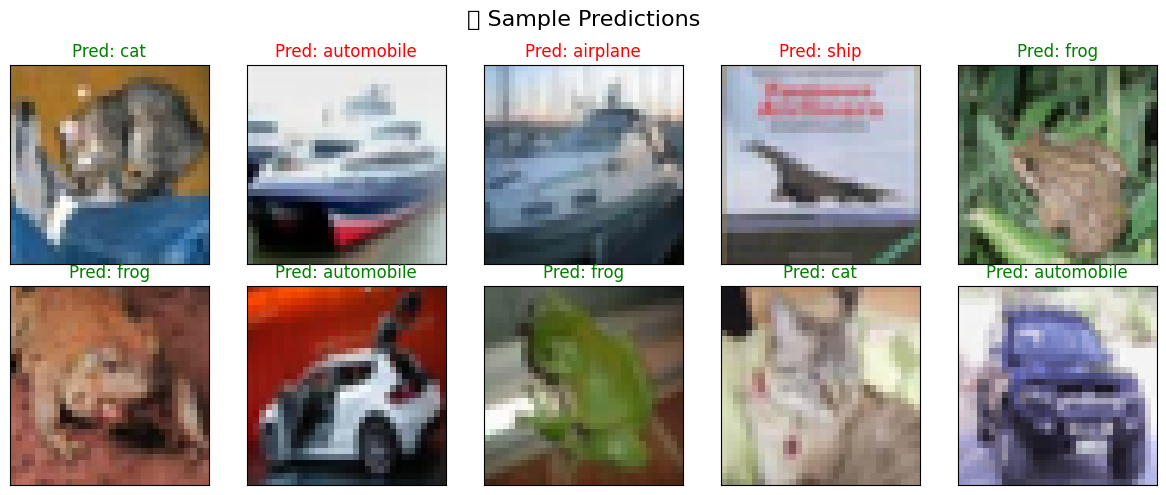

In [13]:

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i][0]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {class_names[pred_label]}", color=color)
plt.suptitle("🔹 Sample Predictions", fontsize=16)
plt.tight_layout()
plt.show()